- Student name: Duy Hieu Nguyen
- SID: 33694052

# 3 **Ridge Regression**

## Task 1
Derive the weight update steps of stochastic gradient descent (SGD) for linear regression with L2 regularisation norm or a system of linear equations that uniquely determine the minimum of the regularised error function. Give this derivation with enough explanation in a
markdown cell (ideally using Latex for readable math typesetting). The starting point is the definition of the regularised error function and the end result is either the weight update step for this function in (stochastic) gradient descent or a system of linear equations described in
matrix/vector notation. In both cases, you have to derive the gradient as an intermediate step.

## Gradient Descent (GD) with L2 Regularization

For linear regression, the **Sum of squared error** $E$ is given by:
\begin{align*}
E(\mathbf{w}) &= \frac{1}{2} \sum_{n=1}^N (t_n - y(\mathbf{x_n}, \mathbf{w}))^2 = \frac{1}{2} \sum_{n=1}^N (t_n - \boldsymbol{\phi}(\mathbf{x})\cdot \mathbf{w})^2 \\
&= \frac{1}{2} \|\mathbf{t} - \boldsymbol{\Phi}\mathbf{w} \|^2
\end{align*}

where
- $t_n$ is the target value for the $n^{th}$ data point.
- $\mathbf{w}$ represents the weight vector.
- $\mathbf{x}_n$ is the $n^{th}$ data point.

In the last form we have made use of the compact matrix/vector notation introduced in the lecture with target vector $\mathbf{t}=(t_1, \dots, t_N)$ and feature matrix $\boldsymbol{\Phi}$ that contains the feature expansions $\boldsymbol{\phi}(\mathbf{x_n})$ as rows.


For L2 regularization, the term added to this error function is:

\begin{align*}
\frac{1}{2} \lambda \sum_{j=1}^D w_j^2  = \frac{1}{2} \lambda \|\mathbf{w}\|_2^2
\end{align*}

Where $ \lambda $ is the regularization coefficient and $ D $ represents the number of features.

Combining the two, the regularized error function $E_{L2}$ becomes:

\begin{align*}
E_{L2}(\mathbf{w}) = E(\mathbf{w}) + \frac{1}{2}\lambda \|\mathbf{w}\|_2^2
\end{align*}

The gradient of this regularized error function with respect to $ \mathbf{w} $ is:

\begin{align*}
\nabla E_{L2}(\mathbf{w}) = \nabla E(\mathbf{w}) + \lambda \mathbf{w}
\end{align*}
given 
\begin{align*}
\nabla E(\mathbf{w}) = \Phi^T(\Phi \mathbf{w} - \mathbf{t}) \enspace .
\end{align*}

For Stochastic Gradient Descent (SGD), the weights are updated using the negative gradient. Let $ \eta $ be the learning rate; the weight update step can be represented as:

\begin{align*}
\mathbf{w}_{\tau} &= \mathbf{w}_{\tau-1} - \eta \nabla E_{L2}(\mathbf{w}_{\tau-1}) \\&= \mathbf{w}_{\tau-1} - \eta(\Phi^T(\Phi \mathbf{w}_{\tau-1} - \mathbf{t}) + \lambda \mathbf{w}_{\tau-1})
\end{align*}

This formula gives us the weight update step for SGD in the context of linear regression with L2 regularization.


## Task 2
Using the analytically derived gradient from Step I, implement either a direct or a (stochastic) gradient descent algorithm for Ridge Regression (use again the usual template with init, fit, and predict methods. You cannot use any import from sklearn.linear model for this task.

##  Gradient descent algorithm for Ridge Regression

In [90]:
import numpy as np
class GDRidgeRegressor:

    def __init__(self, eta=0.01, tau_max=1000, epsilon=0.0001, lambda_=0.1):
        self.eta = eta
        self.tau_max = tau_max
        self.epsilon = epsilon
        self.lambda_ = lambda_  # L2 regularization coefficient
        
    def fit(self, x, y):
        # initial weight matrix with p columns and as many rows as we can have iterations
        # we will store each intermediate weight vector in one row of this matrix
        n, p = x.shape
        self.w_ = np.zeros(shape=(self.tau_max+1, p))

        for tau in range(1, self.tau_max+1):
            # Add the L2 regularization term to the gradient
            grad = x.T.dot(x.dot(self.w_[tau-1])-y) + self.lambda_ * self.w_[tau-1]
            self.w_[tau] = self.w_[tau-1] - self.eta*grad
            # stopping criterion
            if np.linalg.norm(self.w_[tau]-self.w_[tau-1]) < self.epsilon:
                break

        # set final coefficients
        self.coef_ = self.w_[tau] 
        # delete unused rows from weight matrix
        self.w_ = self.w_[:tau+1]
        return self

    def predict(self, x):
        return x.dot(self.coef_)



## Task 3: Effect of L2 regularization
Study the effect of the L2-regularization on the training and testing errors.


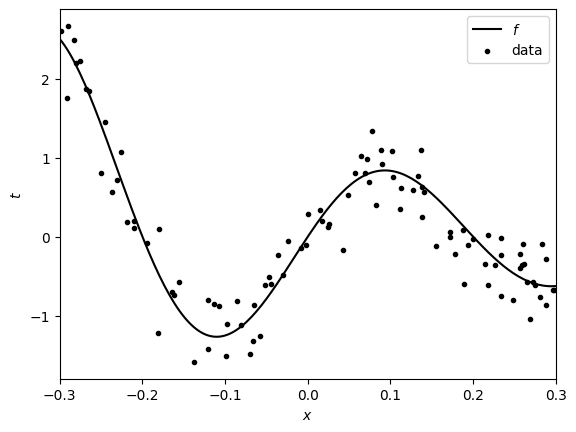

In [91]:
import numpy as np
from matplotlib import pyplot as plt

def f(x):
    return np.sin(5*np.pi*x)/(1+2*x)

def make_additive_noise_data(n, f, a, b, noise=0.1**0.5, random_state=None):
    RNG = np.random.default_rng(random_state)
    x = RNG.uniform(a, b, size=(n, 1))
    y = f(x) + RNG.normal(0, noise, size=(n, 1))
    return x, y

def plot_function(f, a, b, models=[], data=None, ax=None, ax_labels=True, legend=True):
    ax = plt.gca() if ax is None else ax
    xx = np.linspace(a, b, 200).reshape(-1, 1)
    if len(models)==1:
        ax.fill_between(xx.squeeze(), f(xx).squeeze(), models[0].predict(xx).squeeze(), alpha=0.3)
        ax.plot(xx, models[0].predict(xx), label='$y$')
    if len(models) > 1:
        for model in models: ax.plot(xx, model.predict(xx), color='gray', alpha=0.5)
    ax.plot(xx, f(xx), color='black', label='$f$')
    if data is not None:
        x, y = data
        ax.scatter(x, y, marker='.', color='black', label='data')
    if ax_labels:
        ax.set_xlabel('$x$')
        ax.set_ylabel('$t$')
    if legend: ax.legend()
    ax.margins(x=0)

plot_function(f, -0.3, 0.3, data=make_additive_noise_data(100, f, -0.3, 0.3, random_state=0))
plt.show()

In [92]:
class PolynomialFeatures:

    def __init__(self, degree):
        self.degree = degree

    def fit(self, x, y=None):
        return self

    def transform(self, x, y=None):
        output = []
        for i in range(0, self.degree+1):
            column = x**i
            output.append(column)
        return np.column_stack(output)

    def fit_transform(self, x, y=None):
        self.fit(x, y)
        return self.transform(x, y)
    
# Test
# PolynomialFeatures(4).transform(np.array([1.0, 2.0, 3.0]))


In [93]:
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Number of repetitions
num_reps = 10

# Array of lambda values
lambdas = np.geomspace(10**-10, 0.1, 101, endpoint=True)

# Lists to store results
all_train_errors = []
all_test_errors = []

x_test, y_test = make_additive_noise_data(1000, f, -0.3, 0.3, random_state=15)
y_test = y_test.ravel()

for rep in range(num_reps):
    train_errors = []
    test_errors = []
    # Sample training dataset of size 20
    x_train, y_train = make_additive_noise_data(20, f, -0.3, 0.3, random_state=rep)
    y_train = y_train.ravel()
    for lambda_ in lambdas:
        # Create Ridge Regression model
        ridge_regressor = GDRidgeRegressor(lambda_=lambda_)
        pipeline = make_pipeline(PolynomialFeatures(5), ridge_regressor)
        
        # Fit the model
        pipeline.fit(x_train, y_train)

        # Calculate training error
        # train_error = np.mean((y_train - pipeline.predict(x_train))**2)
        train_error = mean_squared_error(y_train, pipeline.predict(x_train))
        train_errors.append(train_error)

        # Calculate test error (if required)
        # test_error = np.mean((y_test - pipeline.predict(x_test))**2)
        test_error = mean_squared_error(y_test, pipeline.predict(x_test))
        test_errors.append(test_error)

    # Append the errors for this repetition to the overall results
    all_train_errors.append(train_errors)
    all_test_errors.append(test_errors)


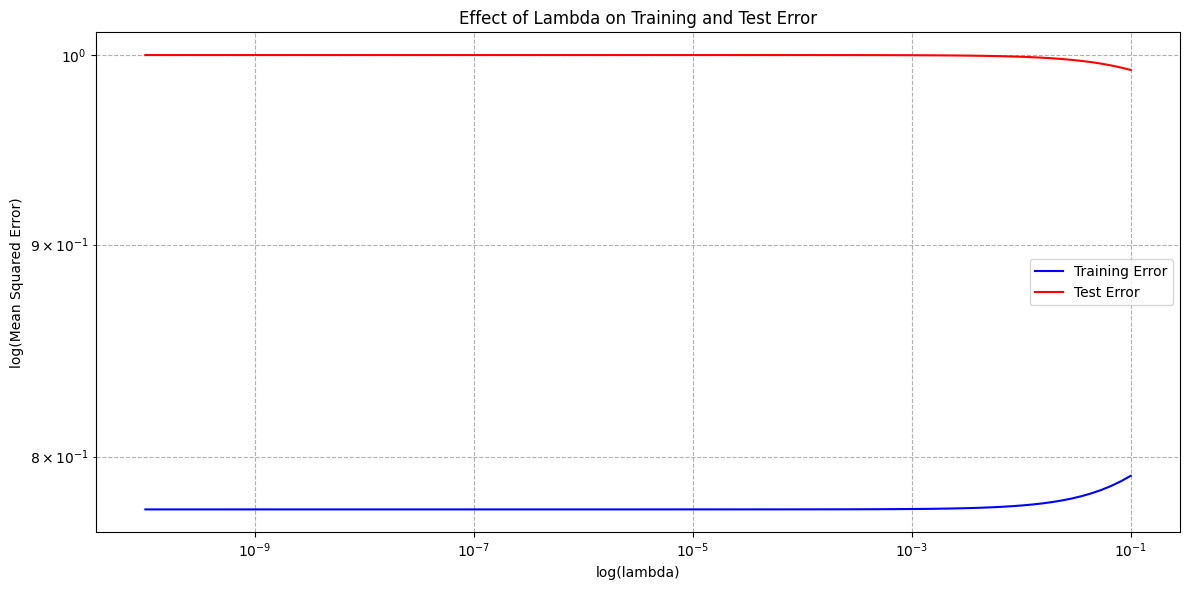

In [94]:
import matplotlib.pyplot as plt

avg_train_errors = np.mean(all_train_errors, axis=0)
avg_test_errors = np.mean(all_test_errors, axis=0)

plt.figure(figsize=(12, 6), tight_layout=True)
plt.plot(lambdas, avg_train_errors, label='Training Error', color='blue')
plt.plot(lambdas, avg_test_errors, label='Test Error', color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log(lambda)')
plt.ylabel('log(Mean Squared Error)')
plt.title('Effect of Lambda on Training and Test Error')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()


## Discussion

### From Graph:
- Test error starts as a flat line, then slightly decreases at the end.
- Training error begins as a flat line, then gradually goes up.
- There's a big gap between test and training errors initially. Towards the end, the gap gets smaller.

### Insights:
- The larger the $\lambda$, the more we penalize large values of the weights in the model ($\lambda \mathbf{w}$), leading to simpler models. Conversely, as $\lambda$ approaches 0, the effect of the regularization reduces, and the model is more likely to fit the training data closely, which can increase its complexity.
    - From the graph, **for small $\lambda$ values**, the model does really well on training data but struggles with test data, reflecting the fact that the model has fit training data very closely and also capture the noise, leading to **overfitting**.
    - **As $\lambda$ increases**, training error rises due to the regularization term penalizing large coefficient values $\lambda \mathbf{w}$ and making the model simpler.  However, the model improves performance on the test data, narrowing the gap between training and test errors. It suggests a trend of unseen U-curve with probably a **optimal $\lambda$**, where the model achieves the best generalization.
    - After this point the model will become too simple, fails to grasp the true patterns in the data, leading to **underfitting** and its performance begins to deteriorate (test error will increase again).